In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.testing import assert_allclose

In [2]:
a = np.array([-0.1, 1.0, 2.0])
print(a)
assert_allclose(a, np.array([-0.1, 1.0, 2.0]))


[-0.1  1.   2. ]


In [3]:
# 3.2.2 ステップ関数の実装
# 初期実装
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

assert step_function(0) == 0
assert step_function(0.1) == 1



In [4]:
# numpy.arrayを引数にとれるように変更
def step_function(x):
    y = x > 0
    return y.astype(np.int)

# NOTE: 全部小数で書くのはnumpyなどの流儀？
assert_allclose(step_function(np.array([-0.1, 1.0, 2.0])), np.array([0, 1, 1]))

# 数値は受け取れなくなる
# assert step_function(0) == 0
# assert step_function(0.1) == 1

In [5]:
# 関数をリファクタリング
def step_function(x):
    return np.array(x > 0, dtype=np.int)

assert_allclose(step_function(np.array([-0.1, 1.0, 2.0])), np.array([0, 1, 1]))


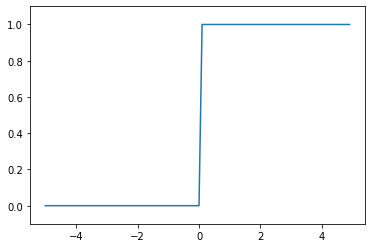

In [6]:
# 3.2.3 ステップ関数のグラフ
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定
plt.show()

In [7]:
# 3.2.4 シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# NOTE: 普通にprintすると8桁で切られてassert通らなかったのに、1個1個確認すると↓になったこれも仕様？
assert_allclose(sigmoid(np.array([-0.1, 1.0, 2.0])), np.array([0.47502081252106, 0.7310585786300049, 0.8807970779778823]))

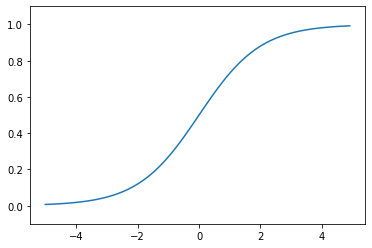

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定
plt.show()

In [9]:
# 3.2.7 ReLU 関数
def relu(x):
    return np.maximum(0, x)
assert_allclose(relu(np.array([-0.1, 1.0, 2.0])), np.array([0, 1, 2]))


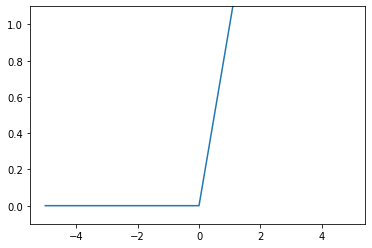

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定
plt.show()

In [11]:
# 3.3.1 多次元配列
# 1次元
array1 = np.array([1, 2, 3, 4])
# 次元数の取得
assert np.ndim(array1) == 1
# 配列の形状
assert array1.shape == (4,)
assert array1.shape[0] == 4


In [12]:
# 2次元
array2 = np.array([[1, 2], [3, 4], [5, 6]])
# 次元数の取得
assert np.ndim(array2) == 2
# 配列の形状
assert array2.shape == (3, 2)


In [13]:
# 3.3.2 行列の積
array3 = np.array([[1, 2], [3, 4]])
array4 = np.array([[5, 6], [7, 8]])
assert array3.shape == (2, 2)
assert array4.shape == (2, 2)

# 行列の積を算出
assert_allclose(np.dot(array3, array4), np.array([[19, 22], [43, 50]]))
assert_allclose(np.dot(array3, array4), np.array([[1*5+2*7, 1*6+2*8], [3*5+4*7, 3*6+4*8]]))

# 引数の順番を入れ替えると出力値は変化する
assert_allclose(np.dot(array4, array3), np.array([[23, 34], [31, 46]]))
assert_allclose(np.dot(array4, array3), np.array([[5*1+6*3, 5*2+6*4], [7*1+8*3, 7*2+8*4]]))


In [14]:
# 2 * 3の行列と3 * 2の行列の積
array5 = np.array([[1, 2, 3], [4, 5, 6]])
array6 = np.array([[1, 2], [3, 4], [5, 6]])
assert array5.shape == (2, 3)
assert array6.shape == (3, 2)
assert_allclose(np.dot(array5, array6), np.array([[22, 28], [49, 64]]))

# 積の返り値は1つ目の行列の行と2つ目の行列の列で構成される
assert np.dot(array5, array6).shape == (2, 2)


In [15]:
# 積の1つ目の行列の列と2つ目の行列の行は同じ値である必要がある
assert array5.shape[1] == array6.shape[0]

array7 = np.array([[1, 2], [3, 4]])
array8 = np.array([[1, 2], [3, 4], [5, 6]])
assert array7.shape == (2, 2)
assert array8.shape == (3, 2)

assert array7.shape[1] != array8.shape[0]

# 異なっていると例外が発生
# ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)
np.dot(array7, array8)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [16]:
# 3.3.3 ニューラルネットワークの行列の積
X = np.array([1, 2])
assert X.shape == (2,)

W = np.array([[1, 3, 5], [2, 4, 6]])
assert W.shape == (2, 3)

Y = np.dot(X, W)
assert_allclose(Y, np.array([5, 11, 17]))

# よくわからない。。。
